# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Jaycent Gunawan Ongris
- **Email:** jaycentgunawanong@gmail.com
- **ID Dicoding:** 

## Menentukan Pertanyaan Bisnis

- Bagaimana tren rata-rata jumlah pelanggan per hari yang menyewa sepeda termasuk casual users dan registered users per bulan dari tahun 2011 hingga tahun 2012?
- Bagaimana hubungan temperatur dengan jumlah total penyewa sepeda per hari pada tahun 2011?
- Pada jam berapa sajakah rata-rata penyewaan sepeda mencapai puncaknya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# read csv data
df_day = pd.read_csv('data/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# read csv data
df_hour = pd.read_csv('data/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [14]:
# melihat informasi terkait dataset
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [15]:
# melihat informasi terkait dataset
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
# cek null value untuk df_hour
df_hour.isnull().sum().sum()

0

In [5]:
# cek null value untuk df_day
df_day.isnull().sum().sum()

0

In [6]:
# cek duplicated value untuk df_hour
df_hour.duplicated().sum()

0

In [7]:
# cek duplicated value untuk df_day
df_day.duplicated().sum()

0

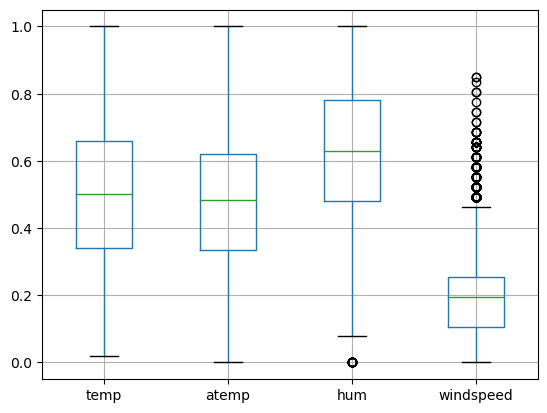

In [8]:
# outliers checking for continuous data
# lebih detail jika menggunakan data jam
included_ft = [ft for ft in df_hour.columns if ft not in ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'casual', 'registered', 'cnt']]
df_hour[included_ft].boxplot()
plt.show()

In [9]:
# lihat jumlah outlier
outliers_counts = {}
for col in included_ft:
    Q1 = df_hour[col].quantile(0.25)
    Q3 = df_hour[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers_count = ((df_hour[col] < lower) | (df_hour[col] > upper)).sum()

    outliers_counts[col] = outliers_count

outliers_counts

{'temp': 0, 'atemp': 0, 'hum': 22, 'windspeed': 342}

In [10]:
df_hour.shape[0]

17379

Dapat dilihat bahwa jumlah outliers sangat sedikit jika dibandingkan dengan total data. Selain itu, data tersebut juga bukan merupakan hasil salah input data dikarenakan masih dalam batas wajar dan masih banyak data lainnya yang tersebar pada daerah tersebut, tidak hanya 1 sampai 2 datapoints saja. Dengan demikian, outliers akan tetap dipertahankan.

### Cleaning Data

Dikarenakan data sudah tidak memiliki null dan duplicate values, serta outliers yang masih bisa ditoleransi, maka proses cleaning pada data tidak diperlukan.

## Exploratory Data Analysis (EDA)

### Eksplorasi Data df_hour

In [11]:
# melihat descriptive statistics untuk df_hour
numerical_ft = [ft for ft in df_hour.columns if ft not in ['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']]
df_hour[numerical_ft].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan eksplorasi tersebut, dapat dilihat bahwa rata-rata jumlah total pengguna tiap jamnya adalah 189.46 yang terdiri dari 35.6 untuk pengguna casual dan 153.7 untuk pengguna registered. Adapun jumlah pengguna minimal per jamnya adalah 1 orang dan jumlah pengguna maksimal per jamnya adalah 977 orang.

### Eksplorasi Data df_day

In [12]:
# melihat descriptive statistics dari df_day
df_day[numerical_ft].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Sementara itu, dapat dilihat bahwa rata-rata jumlah pengguna tiap harinya adalah 4504.34 yang terdiri dari 848.1 untuk pengguna casual dan 3656.1 untuk pengguna registered. Jumlah pengguna minimal per harinya adalah 22 orang dan jumlah pengguna maksimal per harinya adalah 8714 orang.

Untuk menjawab pertanyaan bisnis yang telah didefinisikan sebelumnya, berikut adalah eksplorasi datanya.

Pertanyaan 1

In [24]:
# kita akan melakukan grouping untuk mendapatkan data yang diinginkan
# kita bekerja dengan dataset harian
df_day_1 = df_day[['yr', 'mnth', 'cnt']]
df_day_1.head()

,yr,mnth,cnt
0,0,1,985
1,0,1,801
2,0,1,1349
3,0,1,1562
4,0,1,1600


In [25]:
# kita bisa mereplace dengan 2011 dan 2012 agar lebih informatif
df_day_1['yr'] = df_day_1['yr'].replace({0: 2011, 1: 2012})
df_day_1.head()

C:\Users\jayce\AppData\Local\Temp\ipykernel_5668\3099815805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day_1['yr'] = df_day_1['yr'].replace({0: 2011, 1: 2012})


,yr,mnth,cnt
0,2011,1,985
1,2011,1,801
2,2011,1,1349
3,2011,1,1562
4,2011,1,1600


In [56]:
# untuk menggabungkan data harian kita bisa menggunakan beberapa
# fungsi agregasi, dalam hal ini akan digunakan mean sesuai pertanyaan bisnis
avg_count = df_day_1.groupby(['yr', 'mnth'])['cnt'].mean()
avg_count

yr    mnth
2011  1       1231.903226
      2       1721.964286
      3       2065.967742
      4       3162.333333
      5       4381.322581
      6       4783.733333
      7       4559.387097
      8       4409.387097
      9       4247.266667
      10      3984.225806
      11      3405.566667
      12      2816.870968
2012  1       3120.774194
      2       3556.448276
      3       5318.548387
      4       5807.466667
      5       6318.225806
      6       6761.000000
      7       6567.967742
      8       6919.451613
      9       7285.766667
      10      6414.225806
      11      5088.800000
      12      3990.741935
Name: cnt, dtype: float64

Pertanyaan 2

In [28]:
# dikarenakan per hari, maka kita akan bekerja dengan dataset hari
# mengambil atribut yang diperlukan saja
df_day_2 = df_day[['temp', 'cnt']]
df_day_2.head()

,temp,cnt
0,0.344167,985
1,0.363478,801
2,0.196364,1349
3,0.200000,1562
4,0.226957,1600


In [29]:
# mengembalikan temperatur ke skala aslinya agar lebih mudah interpretasinya
df_day_2['temp'] = df_day_2['temp'] * 41
df_day_2.head()

C:\Users\jayce\AppData\Local\Temp\ipykernel_5668\1115368889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day_2['temp'] = df_day_2['temp'] * 41


,temp,cnt
0,14.110847,985
1,14.902598,801
2,8.050924,1349
3,8.200000,1562
4,9.305237,1600


In [30]:
# untuk melihat hubungan keduanya, kita dapat menggunakan korelasi
df_day_2.corr()

,temp,cnt
temp,1.000000,0.627494
cnt,0.627494,1.000000


Pertanyaan 3

In [33]:
# kita akan bekerja dengan dataset hour
# gunakan fitur yang diperlukan saja
df_hour_3 = df_hour[['hr', 'cnt']]
df_hour_3.head()

,hr,cnt
0,0,16
1,1,40
2,2,32
3,3,13
4,4,1


In [34]:
# menghitung rata-rata per jam
avg_cnt_hr = df_hour_3.groupby(['hr'])['cnt'].mean()
avg_cnt_hr

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64

## Visualization & Explanatory Analysis

### Pertanyaan 1:

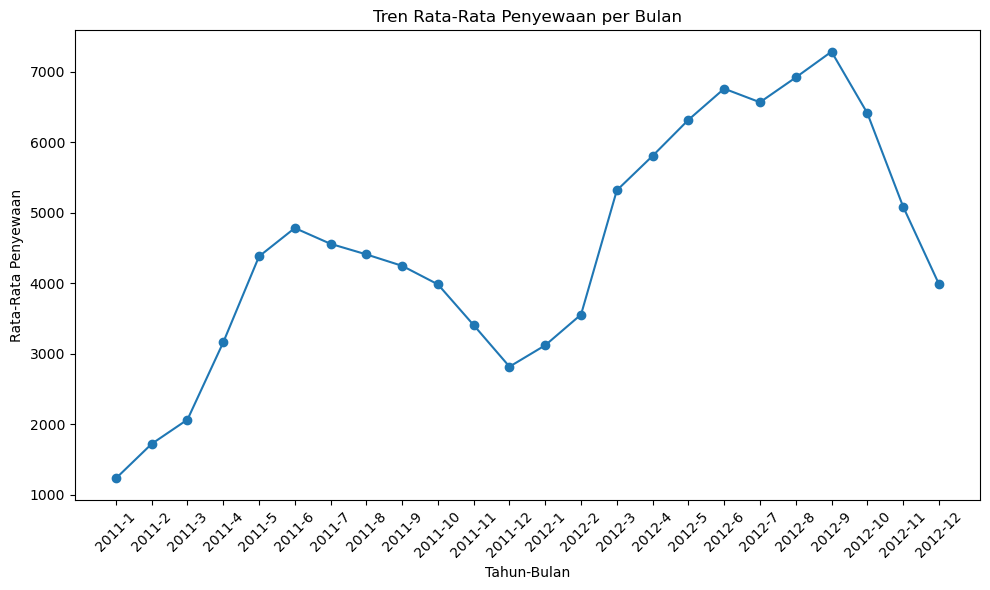

In [57]:
# visualisasi untuk pertanyaan 1
# untuk x axis
avg_count.index = avg_count.index.map('{0[0]}-{0[1]}'.format)

# lakukan plotting berupa line graph
plt.figure(figsize=(10, 6))
plt.plot(avg_count.index, avg_count.values, marker='o', linestyle='-')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Rata-Rata Penyewaan')
plt.title('Tren Rata-Rata Penyewaan per Bulan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan 2:

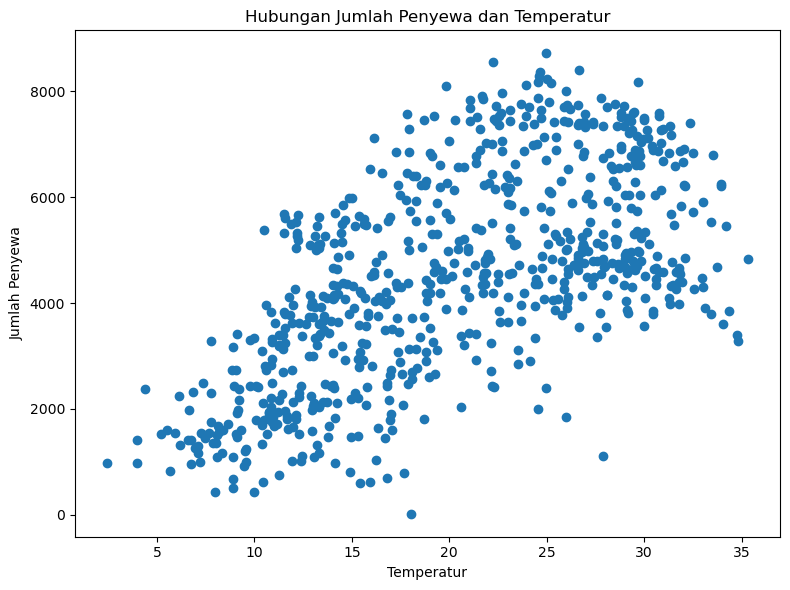

In [59]:
# visualisasi untuk pertanyaan 2
# kita dapat menggunakan scatterplot untuk melihat persebaran datanya
plt.figure(figsize=(8, 6))
plt.scatter(df_day_2['temp'], df_day_2['cnt'])
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Penyewa')
plt.title('Hubungan Jumlah Penyewa dan Temperatur')
plt.tight_layout()
plt.show()

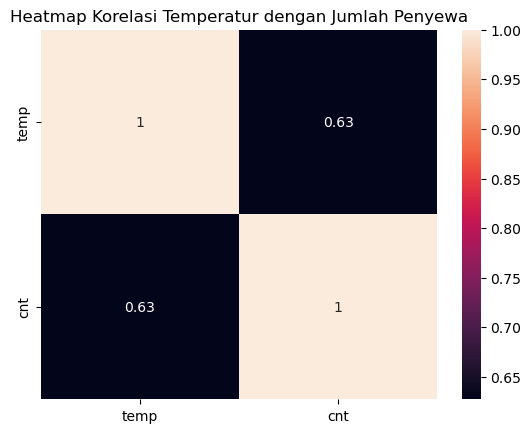

In [71]:
# heatmap korelasi juga dapat digunakan
sns.heatmap(df_day_2.corr(), annot=True)
plt.title('Heatmap Korelasi Temperatur dengan Jumlah Penyewa')
plt.show()

### Pertanyaan 3:

In [66]:
# urutkan data terlebih dahulu
sorted_avg_cnt_hr = avg_cnt_hr.sort_values()
sorted_avg_cnt_hr

hr
4       6.352941
3      11.727403
5      19.889819
2      22.869930
1      33.375691
0      53.898072
6      76.044138
23     87.831044
22    131.335165
21    172.314560
10    173.668501
11    208.143054
7     212.064649
9     219.309491
20    226.030220
14    240.949246
15    251.233196
12    253.315934
13    253.661180
19    311.523352
16    311.983562
8     359.011004
18    425.510989
17    461.452055
Name: cnt, dtype: float64

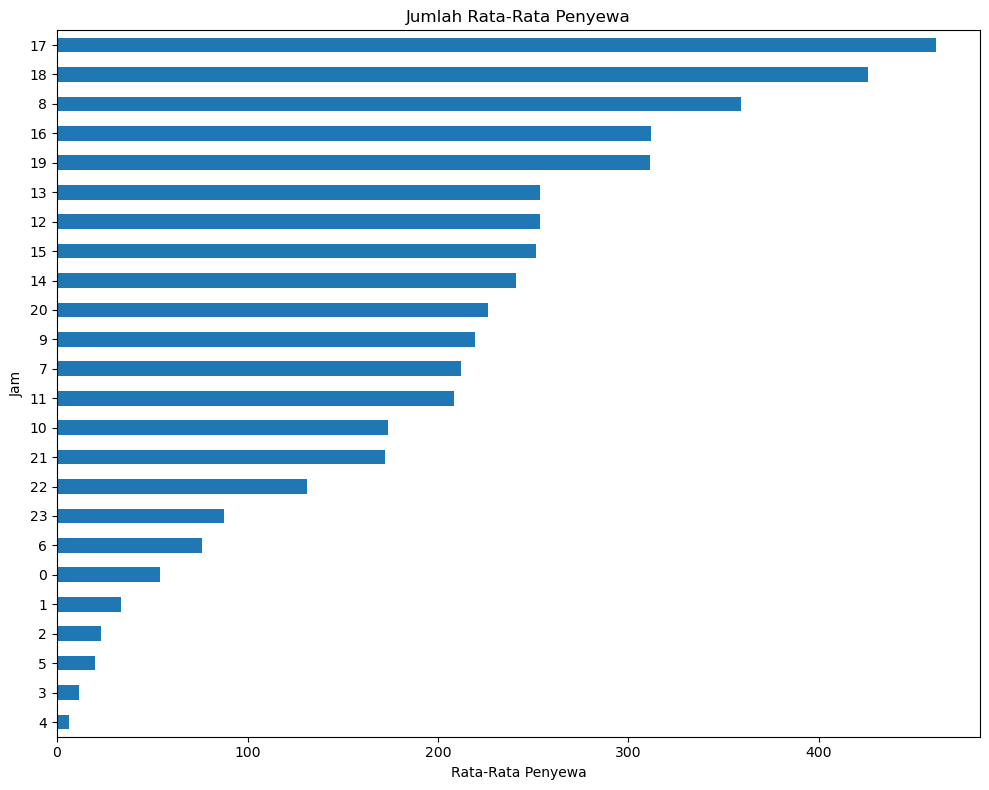

In [67]:
# visualisasikan dengan barchart berdasarkan data terurut
plt.figure(figsize=(10, 8))
sorted_avg_cnt_hr.plot(kind='barh')
plt.xlabel('Rata-Rata Penyewa')
plt.ylabel('Jam')
plt.title('Jumlah Rata-Rata Penyewa')
plt.tight_layout()
plt.show()

## Conclusion

- Dapat dilihat bahwa tren rata-rata jumlah penyewa sepeda per bulan semakin meningkat hingga mencapai puncaknya pada sekitar pertengahan bulan (bulan 6 pada 2011 dan bulan 9 pada 2012). Setelah melalui puncak tersebut, tren rata-rata penyewaan sepeda menurun di sisa tahun dan kemudian meningkat lagi di awal tahun. Pola tersebut dapat dilihat untuk tahun 2011 dan 2012.
- Dapat dilihat bahwa antara temperatur dan jumlah penyewa sepeda per harinya memiliki korelasi yang cukup kuat, yaitu sekitar 0.63. Hal ini juga dapat diobservasi pada scatterplot, di mana terdapat adanya kecenderungan linear dari persebaran kedua variabel tersebut.
- Dapat dilihat bahwa jumlah rata-rata penyewa sepeda mencapai puncaknya pada pukul 17.00, yang kemudian diikuti oleh pukul 18.00 dan 08.00